Plato workbook

In [1]:
import pandas as pd

from core.core import Core, load_data

In [2]:
core = Core()

Generating Data using core

Note: generated data is saved to generated_data.csv by default




In [3]:
core.generate_data(num_rows=100_000, columns=[
    {"name": "age", "data_type": "int", "options": {"min": 18, "max": 75}},
    {"name": "name", "data_type": "name"},
    {"name": "email", "data_type": "email"},
    {"name": "address", "data_type": "address"},
    {"name": "phone", "data_type": "phone"},
    {"name": "company", "data_type": "company"},
    {"name": "text", "data_type": "text", "options": {"max_nb_chars": 20000}},
    {"name": "income", "data_type": "float", "options": {"min": 10000, "max": 250000}},
    {"name": "salary", "data_type": "float", "options": {"min": 10000, "max": 300000}},
    {
        "name": "date_joined",
        "data_type": "date",
        "options": {"min": "2022-01-01", "max": "2022-12-31"}
    },
])

INFO:plato:Generating data...
INFO:plato:Data generated and saved to 'generated_data.csv'.


,age,name,email,address,phone,company,text,income,salary,date_joined
0,32,Laura Cobb,dawn73@example.com,"2688 Smith Mews\nRamosburgh, MS 12042",(448)727-1397x19304,Alvarado-Long,Past physical response paper week three. Beaut...,119221.878503,141785.688430,2011-10-11
1,20,Danielle Adams,suzanne24@example.net,"14400 Martinez Course\nEast Christinaborough, ...",763.558.1326x4072,"Ward, Murphy and Marshall",Into decide know. Sing list year professional ...,84124.981790,170903.299857,2009-02-07
2,36,Robert Roth,howellrobert@example.org,"731 Boyer Fort Suite 876\nAnitaburgh, MS 30415",001-584-408-7472x061,Roberson Group,Relationship because tree action matter confer...,48535.151686,206878.896605,1999-07-28
3,26,Mark Bowman,luiswilliams@example.net,"2882 King Hill Apt. 157\nNew Stephanie, SD 30874",+1-238-422-5684x805,Walker Inc,Under learn million step local nature region. ...,123051.129131,293084.537992,2013-05-24
4,65,Robert Delacruz,angela82@example.com,"707 Tammy Land\nHunterberg, SC 73149",(993)897-1605x228,Torres-Lozano,Hope resource yard perform family find decade....,231925.774511,17167.943187,2014-04-14
...,...,...,...,...,...,...,...,...,...,...
99995,42,Stephen Kelly,zacharymartinez@example.net,"81199 Caldwell Pine\nStevenberg, MD 61251",214.600.9133x99871,"Campbell, Watson and Chang",Final eight south recognize. Attention unit wi...,26172.219815,151271.939329,2007-01-03
99996,53,Margaret Eaton,harpervictor@example.com,"8525 Kathryn Creek\nHopkinston, MA 81993",250-833-7242x7524,Roberts Ltd,Such order whom risk start cut grow. Beyond yo...,235590.262048,26958.539205,2007-02-09
99997,21,Angela Nelson,tinaallen@example.com,"8271 Ewing Radial Apt. 350\nJacksontown, IN 46660",261.396.6693x34055,Torres PLC,Space soon five general answer. Visit natural ...,68528.173887,246079.708193,2004-04-22
99998,30,Mark Thompson,david04@example.org,"1845 Hernandez Tunnel Suite 223\nEast Austin, ...",(339)503-6572,Merritt-Smith,Since finish hand imagine indicate site on. Ra...,15492.587449,157244.918105,2024-03-17


Save generated data to SQLite database and query it

In [4]:
core.save_to_sqlite(db_path='data.db', table_name='generated_data')


INFO:plato:Database connection created with data.db
INFO:plato:DataFrame saved to table generated_data
INFO:plato:Data saved to SQLite database 'data.db'.


In [5]:
results = core.query_data(query='SELECT * FROM generated_data WHERE age > 20 LIMIT 200')
print(results)

INFO:plato:Database connection created with data.db
INFO:plato:Query executed: SELECT * FROM generated_data WHERE age > 20 LIMIT 200
INFO:plato:Query executed successfully.
INFO:plato:Database connection closed


[(32, 'Laura Cobb', 'dawn73@example.com', '2688 Smith Mews\nRamosburgh, MS 12042', '(448)727-1397x19304', 'Alvarado-Long', 'Past physical response paper week three. Beautiful draw place fire western of manager. Nature material eat social get heavy leader.\nCup high leader  ... (19870 characters truncated) ...  everything health they. Bring end walk industry.\nGrow health firm what tax response cultural. Civil itself reduce position.\nGoal bad speech break.', 119221.8785027773, 141785.68842955815, '2011-10-11'), (36, 'Robert Roth', 'howellrobert@example.org', '731 Boyer Fort Suite 876\nAnitaburgh, MS 30415', '001-584-408-7472x061', 'Roberson Group', 'Relationship because tree action matter conference animal. Include stay factor.\nFirst behavior describe again. Peace sort beyond design rock town ci ... (19840 characters truncated) ...  discuss amount figure.\nLow cut several game. Owner nearly door whatever contain.\nCamera despite painting here country offer PM. Almost pass leave.', 485

Loading data from SQLite database

In [6]:
df = load_data('generated_data.csv')
print(df.info())

INFO:plato:Database connection created with plato-broken.db
INFO:plato:[bold green]INFO:[/bold green] CSV file loaded from generated_data.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   age          100000 non-null  int64  
 1   name         100000 non-null  object 
 2   email        100000 non-null  object 
 3   address      100000 non-null  object 
 4   phone        100000 non-null  object 
 5   company      100000 non-null  object 
 6   text         100000 non-null  object 
 7   income       100000 non-null  float64
 8   salary       100000 non-null  float64
 9   date_joined  100000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB
None


In [7]:
from data_transformation.cleaner import DataCleaner

In [8]:
cleaner = DataCleaner(df)


In [9]:
cleaner.remove_duplicates()
cleaner.remove_outliers(['age', 'income'], "IQR", 1.5)
cleaner.convert_data_types(['date_joined'], 'datetime')
cleaner.get_cleaned_data().head()



INFO:data_transformation.cleaner:Duplicates removed
INFO:data_transformation.cleaner:Outliers removed using IQR method
INFO:data_transformation.cleaner:Data types converted for columns: ['date_joined'] to datetime


,age,name,email,address,phone,company,text,income,salary,date_joined
0,32,Laura Cobb,dawn73@example.com,"2688 Smith Mews\nRamosburgh, MS 12042",(448)727-1397x19304,Alvarado-Long,Past physical response paper week three. Beaut...,119221.878503,141785.688430,2011-10-11
1,20,Danielle Adams,suzanne24@example.net,"14400 Martinez Course\nEast Christinaborough, ...",763.558.1326x4072,"Ward, Murphy and Marshall",Into decide know. Sing list year professional ...,84124.981790,170903.299857,2009-02-07
2,36,Robert Roth,howellrobert@example.org,"731 Boyer Fort Suite 876\nAnitaburgh, MS 30415",001-584-408-7472x061,Roberson Group,Relationship because tree action matter confer...,48535.151686,206878.896605,1999-07-28
3,26,Mark Bowman,luiswilliams@example.net,"2882 King Hill Apt. 157\nNew Stephanie, SD 30874",+1-238-422-5684x805,Walker Inc,Under learn million step local nature region. ...,123051.129131,293084.537992,2013-05-24
4,65,Robert Delacruz,angela82@example.com,"707 Tammy Land\nHunterberg, SC 73149",(993)897-1605x228,Torres-Lozano,Hope resource yard perform family find decade....,231925.774511,17167.943187,2014-04-14


In [10]:
cleaner.normalize_data(['age', 'income'])
cleaner.get_cleaned_data().head()

INFO:data_transformation.cleaner:Data normalized for columns: ['age', 'income']


,age,name,email,address,phone,company,text,income,salary,date_joined
0,0.245614,Laura Cobb,dawn73@example.com,"2688 Smith Mews\nRamosburgh, MS 12042",(448)727-1397x19304,Alvarado-Long,Past physical response paper week three. Beaut...,0.455084,141785.688430,2011-10-11
1,0.035088,Danielle Adams,suzanne24@example.net,"14400 Martinez Course\nEast Christinaborough, ...",763.558.1326x4072,"Ward, Murphy and Marshall",Into decide know. Sing list year professional ...,0.308845,170903.299857,2009-02-07
2,0.315789,Robert Roth,howellrobert@example.org,"731 Boyer Fort Suite 876\nAnitaburgh, MS 30415",001-584-408-7472x061,Roberson Group,Relationship because tree action matter confer...,0.160551,206878.896605,1999-07-28
3,0.140351,Mark Bowman,luiswilliams@example.net,"2882 King Hill Apt. 157\nNew Stephanie, SD 30874",+1-238-422-5684x805,Walker Inc,Under learn million step local nature region. ...,0.471040,293084.537992,2013-05-24
4,0.824561,Robert Delacruz,angela82@example.com,"707 Tammy Land\nHunterberg, SC 73149",(993)897-1605x228,Torres-Lozano,Hope resource yard perform family find decade....,0.924693,17167.943187,2014-04-14


In [11]:
cleaner.standardize_data(['age', 'income'])
cleaner.get_cleaned_data().head()

INFO:data_transformation.cleaner:Data standardized for columns: ['age', 'income']


,age,name,email,address,phone,company,text,income,salary,date_joined
0,-0.871149,Laura Cobb,dawn73@example.com,"2688 Smith Mews\nRamosburgh, MS 12042",(448)727-1397x19304,Alvarado-Long,Past physical response paper week three. Beaut...,-0.151763,141785.688430,2011-10-11
1,-1.586330,Danielle Adams,suzanne24@example.net,"14400 Martinez Course\nEast Christinaborough, ...",763.558.1326x4072,"Ward, Murphy and Marshall",Into decide know. Sing list year professional ...,-0.658028,170903.299857,2009-02-07
2,-0.632755,Robert Roth,howellrobert@example.org,"731 Boyer Fort Suite 876\nAnitaburgh, MS 30415",001-584-408-7472x061,Roberson Group,Relationship because tree action matter confer...,-1.171403,206878.896605,1999-07-28
3,-1.228740,Mark Bowman,luiswilliams@example.net,"2882 King Hill Apt. 157\nNew Stephanie, SD 30874",+1-238-422-5684x805,Walker Inc,Under learn million step local nature region. ...,-0.096527,293084.537992,2013-05-24
4,1.095599,Robert Delacruz,angela82@example.com,"707 Tammy Land\nHunterberg, SC 73149",(993)897-1605x228,Torres-Lozano,Hope resource yard perform family find decade....,1.473965,17167.943187,2014-04-14


In [12]:
df = cleaner.get_cleaned_data()


In [13]:
from data_transformation.transformer import DataTransformer

In [14]:
transformer = DataTransformer(df)

In [15]:
transformer.scale_data(['age', 'income'])


INFO:data_transformation.transformer:Data scaled using minmax method for column: age
INFO:data_transformation.transformer:Data scaled using minmax method for column: income


In [16]:
transformer.get_transformed_data().head()

,age,name,email,address,phone,company,text,income,salary,date_joined
0,0.245614,Laura Cobb,dawn73@example.com,"2688 Smith Mews\nRamosburgh, MS 12042",(448)727-1397x19304,Alvarado-Long,Past physical response paper week three. Beaut...,0.455084,141785.688430,2011-10-11
1,0.035088,Danielle Adams,suzanne24@example.net,"14400 Martinez Course\nEast Christinaborough, ...",763.558.1326x4072,"Ward, Murphy and Marshall",Into decide know. Sing list year professional ...,0.308845,170903.299857,2009-02-07
2,0.315789,Robert Roth,howellrobert@example.org,"731 Boyer Fort Suite 876\nAnitaburgh, MS 30415",001-584-408-7472x061,Roberson Group,Relationship because tree action matter confer...,0.160551,206878.896605,1999-07-28
3,0.140351,Mark Bowman,luiswilliams@example.net,"2882 King Hill Apt. 157\nNew Stephanie, SD 30874",+1-238-422-5684x805,Walker Inc,Under learn million step local nature region. ...,0.471040,293084.537992,2013-05-24
4,0.824561,Robert Delacruz,angela82@example.com,"707 Tammy Land\nHunterberg, SC 73149",(993)897-1605x228,Torres-Lozano,Hope resource yard perform family find decade....,0.924693,17167.943187,2014-04-14


In [17]:
transformer.log_transform(['age', 'income'])
transformer.get_transformed_data().head()

INFO:data_transformation.transformer:Log transformation applied to columns: ['age', 'income']


,age,name,email,address,phone,company,text,income,salary,date_joined
0,0.219629,Laura Cobb,dawn73@example.com,"2688 Smith Mews\nRamosburgh, MS 12042",(448)727-1397x19304,Alvarado-Long,Past physical response paper week three. Beaut...,0.375064,141785.688430,2011-10-11
1,0.034486,Danielle Adams,suzanne24@example.net,"14400 Martinez Course\nEast Christinaborough, ...",763.558.1326x4072,"Ward, Murphy and Marshall",Into decide know. Sing list year professional ...,0.269145,170903.299857,2009-02-07
2,0.274437,Robert Roth,howellrobert@example.org,"731 Boyer Fort Suite 876\nAnitaburgh, MS 30415",001-584-408-7472x061,Roberson Group,Relationship because tree action matter confer...,0.148895,206878.896605,1999-07-28
3,0.131336,Mark Bowman,luiswilliams@example.net,"2882 King Hill Apt. 157\nNew Stephanie, SD 30874",+1-238-422-5684x805,Walker Inc,Under learn million step local nature region. ...,0.385970,293084.537992,2013-05-24
4,0.601340,Robert Delacruz,angela82@example.com,"707 Tammy Land\nHunterberg, SC 73149",(993)897-1605x228,Torres-Lozano,Hope resource yard perform family find decade....,0.654766,17167.943187,2014-04-14


In [18]:
binned_age = transformer.bin_data('age', 3, ['young', 'middle-aged', 'old'])
binned_age.get_transformed_data().head()

INFO:data_transformation.transformer:Data binned for columns: age


,age,name,email,address,phone,company,text,income,salary,date_joined
0,young,Laura Cobb,dawn73@example.com,"2688 Smith Mews\nRamosburgh, MS 12042",(448)727-1397x19304,Alvarado-Long,Past physical response paper week three. Beaut...,0.375064,141785.688430,2011-10-11
1,young,Danielle Adams,suzanne24@example.net,"14400 Martinez Course\nEast Christinaborough, ...",763.558.1326x4072,"Ward, Murphy and Marshall",Into decide know. Sing list year professional ...,0.269145,170903.299857,2009-02-07
2,middle-aged,Robert Roth,howellrobert@example.org,"731 Boyer Fort Suite 876\nAnitaburgh, MS 30415",001-584-408-7472x061,Roberson Group,Relationship because tree action matter confer...,0.148895,206878.896605,1999-07-28
3,young,Mark Bowman,luiswilliams@example.net,"2882 King Hill Apt. 157\nNew Stephanie, SD 30874",+1-238-422-5684x805,Walker Inc,Under learn million step local nature region. ...,0.385970,293084.537992,2013-05-24
4,old,Robert Delacruz,angela82@example.com,"707 Tammy Land\nHunterberg, SC 73149",(993)897-1605x228,Torres-Lozano,Hope resource yard perform family find decade....,0.654766,17167.943187,2014-04-14


In [19]:
# round income using custom function
def round_salary(x):
    return round(x, -3)
transformer.apply_custom_transform('salary', round_salary)
transformer.get_transformed_data().head()


INFO:data_transformation.transformer:Custom transformation applied to columns: salary


,age,name,email,address,phone,company,text,income,salary,date_joined
0,young,Laura Cobb,dawn73@example.com,"2688 Smith Mews\nRamosburgh, MS 12042",(448)727-1397x19304,Alvarado-Long,Past physical response paper week three. Beaut...,0.375064,142000.0,2011-10-11
1,young,Danielle Adams,suzanne24@example.net,"14400 Martinez Course\nEast Christinaborough, ...",763.558.1326x4072,"Ward, Murphy and Marshall",Into decide know. Sing list year professional ...,0.269145,171000.0,2009-02-07
2,middle-aged,Robert Roth,howellrobert@example.org,"731 Boyer Fort Suite 876\nAnitaburgh, MS 30415",001-584-408-7472x061,Roberson Group,Relationship because tree action matter confer...,0.148895,207000.0,1999-07-28
3,young,Mark Bowman,luiswilliams@example.net,"2882 King Hill Apt. 157\nNew Stephanie, SD 30874",+1-238-422-5684x805,Walker Inc,Under learn million step local nature region. ...,0.385970,293000.0,2013-05-24
4,old,Robert Delacruz,angela82@example.com,"707 Tammy Land\nHunterberg, SC 73149",(993)897-1605x228,Torres-Lozano,Hope resource yard perform family find decade....,0.654766,17000.0,2014-04-14


In [20]:
from data_analysis.quant import QuantitativeAnalysis

In [21]:
quant = QuantitativeAnalysis(cleaner.get_cleaned_data())

In [22]:
quant.descriptive_statistics()

INFO:data_analysis.quant:Descriptive statistics calculated


,age,income,salary,date_joined
count,1.000000e+05,1.000000e+05,100000.000000,100000
mean,-2.513900e-16,1.087841e-16,154863.622458,2009-06-29 20:16:12.576000256
min,-1.705527e+00,-1.727212e+00,10012.216911,1994-06-15 00:00:00
25%,-8.711492e-01,-8.653261e-01,82404.375711,2002-01-02 18:00:00
50%,2.282739e-02,-7.849758e-03,154657.543765,2009-06-22 00:00:00
75%,8.572056e-01,8.676717e-01,226982.794000,2016-12-29 00:00:00
max,1.691584e+00,1.734670e+00,299997.946705,2024-06-14 00:00:00
std,1.000000e+00,1.000000e+00,83604.343371,NaN


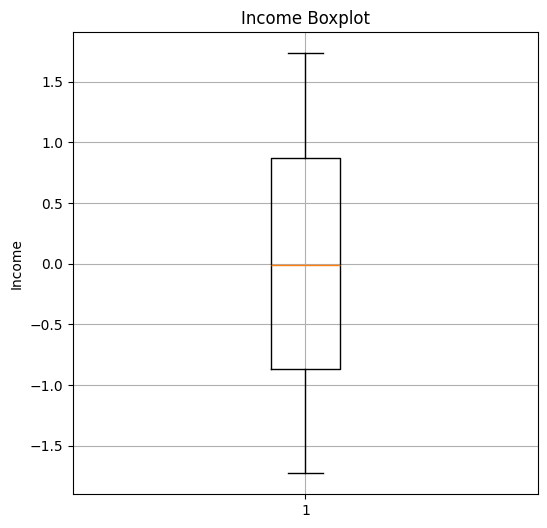

In [23]:
import matplotlib.pyplot as plt

# Visualization 3: Boxplot of 'income'
plt.figure(figsize=(6, 6))
plt.boxplot(df['income'])
plt.title('Income Boxplot')
plt.ylabel('Income')
plt.grid(True)
plt.show()

In [24]:
quant.correlation_matrix()

INFO:data_analysis.quant:Correlation matrix calculated


,age,income,salary
age,1.000000,0.001338,0.002164
income,0.001338,1.000000,-0.000056
salary,0.002164,-0.000056,1.000000


INFO:data_analysis.quant:Correlation matrix calculated


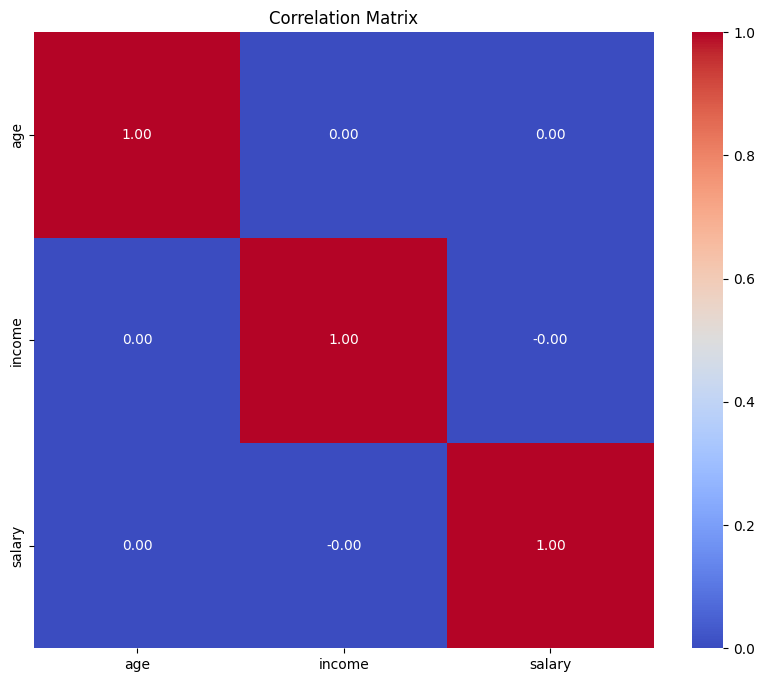

INFO:data_analysis.quant:Correlation matrix plotted


In [25]:
quant.plot_correlation_matrix()

In [26]:
quant.linear_regression('age', ['income', 'salary'])

INFO:data_analysis.quant:Linear regression performed


{'model': LinearRegression(),
 'predictions': array([ 0.00053545, -0.00055529,  0.00033122, ..., -0.00012676,
         0.00061061,  0.00044486]),
 'mse': 0.9952666701590166,
 'r2': -3.223779224392764e-05}

In [27]:
quant.hypothesis_testing('age', 'income')

INFO:data_analysis.quant:Hypothesis testing performed: t-test between age and income


{'statistic': -8.053737998598673e-14, 'p_value': 0.9999999999999357}

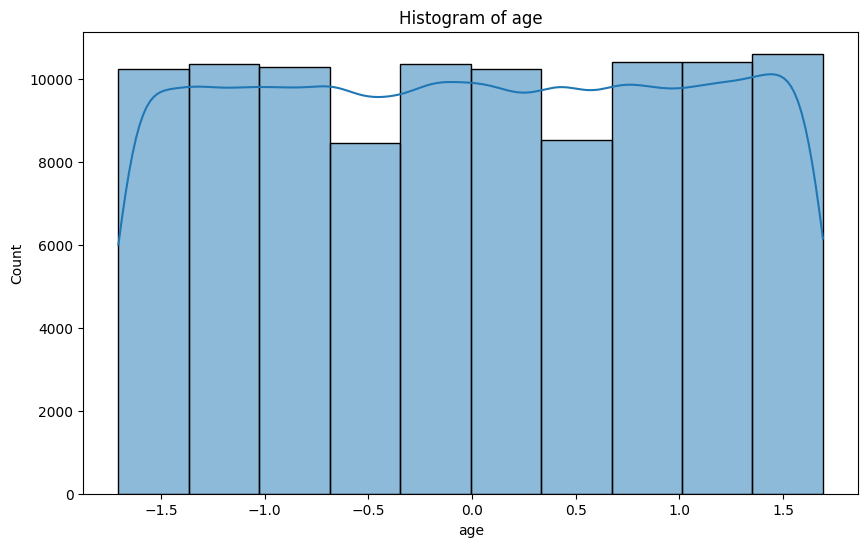

INFO:data_analysis.quant:Histogram plotted for column: age


In [28]:
quant.plot_histogram('age')

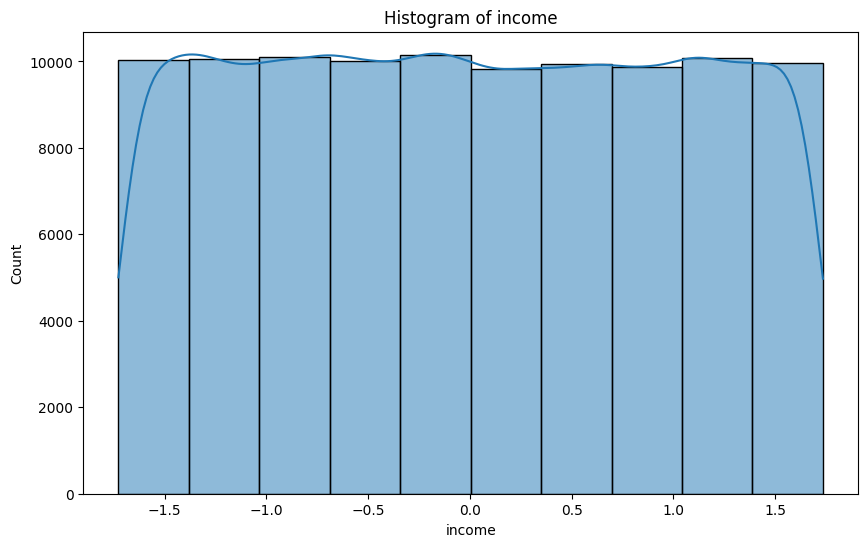

INFO:data_analysis.quant:Histogram plotted for column: income


In [29]:
quant.plot_histogram('income')

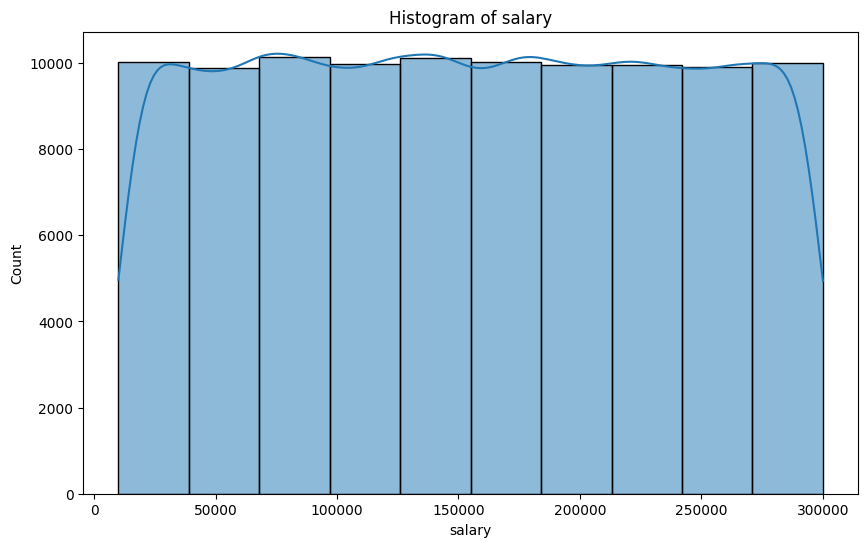

INFO:data_analysis.quant:Histogram plotted for column: salary


In [30]:
quant.plot_histogram('salary')

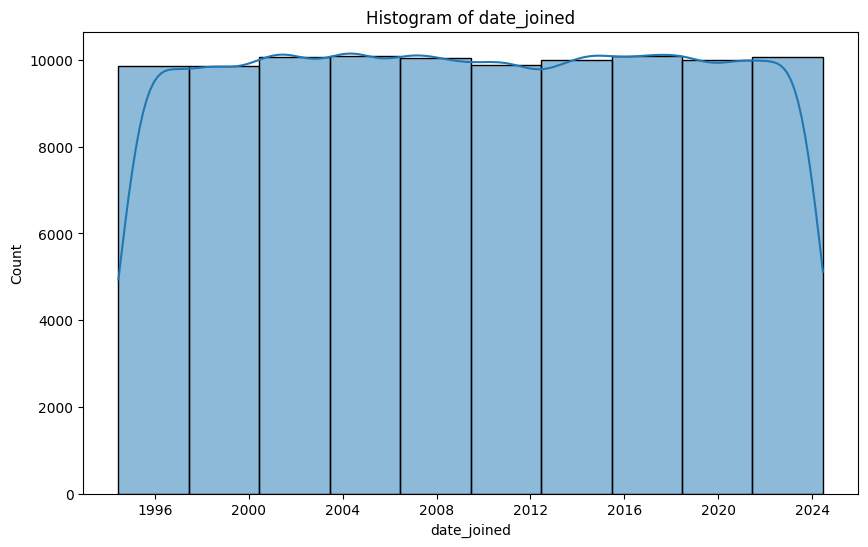

INFO:data_analysis.quant:Histogram plotted for column: date_joined


In [31]:
quant.plot_histogram('date_joined')

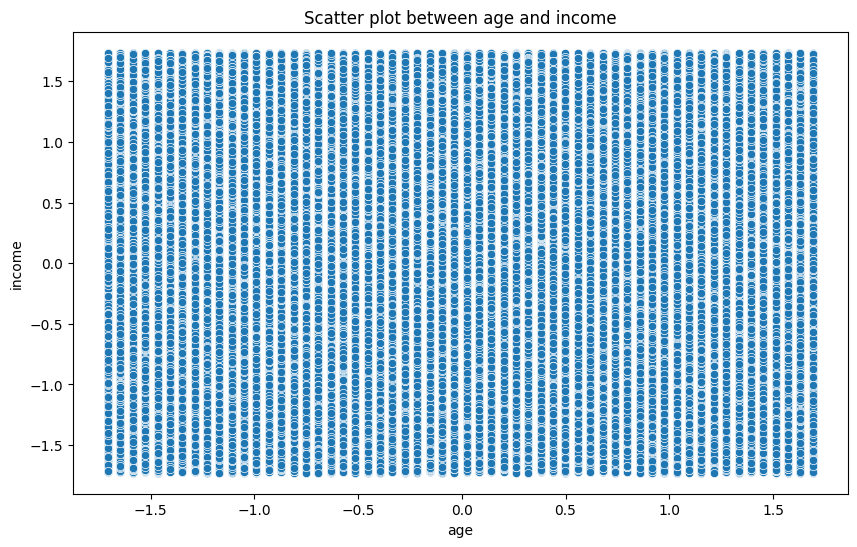

INFO:data_analysis.quant:Scatter plot plotted between age and income


In [32]:
quant.plot_scatter('age', 'income')

In [33]:
from data_analysis.qual import QualitativeAnalysis

In [34]:
qual = QualitativeAnalysis(cleaner.get_cleaned_data())

In [ ]:
qual.sentiment_analysis('text')

In [ ]:
qual.generate_wordcloud('text')

In [ ]:
qual.keyword_extraction('text')

In [ ]:
from data_modeling.modeler import Modeler

In [ ]:
modeler = Modeler(cleaner.get_cleaned_data())

In [ ]:
X_train, X_test, y_train, y_test = modeler.train_test_split('income', ['age', 'salary'])

In [ ]:
lr = modeler.linear_regression(X_train, X_test, y_train, y_test)

In [ ]:
lr_predictions = lr.get('predictions')

In [ ]:
rf = modeler.random_forest_regressor(X_train, X_test, y_train, y_test)

In [ ]:
rf_predictions = rf.get('predictions')

In [ ]:
rf_predictions

In [ ]:
lr_predictions = pd.Series(lr_predictions)
rf_predictions = pd.Series(rf_predictions)
joined_predictions = pd.concat([lr_predictions, rf_predictions], axis=1)

In [ ]:
# add original income values
joined_predictions['income'] = y_test
joined_predictions['age'] = X_test['age']
joined_predictions['salary'] = X_test['salary']

In [ ]:
from data_modeling.visualizer import Visualizer

In [ ]:
visualizer = Visualizer(joined_predictions)

In [ ]:
visualizer.plot_correlation_matrix()


In [ ]:
visualizer.plot_3d_scatter('age', 'salary', 'income', color='income')

In [ ]:
visualizer.plot_distribution(column='income', color='gold', title='Income Distribution by Age')